In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import joblib
import random

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
df = pd.read_csv('trans_data/combined_grid_centers.csv')
df = df.iloc[random.sample([i for i in range(len(df))], 1000), :].sort_index()
df.to_csv('trans_data/combined_grid_centers_sample.csv')

In [21]:

# 데이터 불러오기
file_path = 'trans_data/combined_grid_centers.csv'
sample_file_path = 'trans_data/combined_grid_centers_sample.csv'

data = pd.read_csv(file_path)

# 독립변수와 종속변수 설정
feature_names = ['school_distance', 'baby_school_distance', 'elderly_center_distance',
                 'fire_station_distance', 'rescue_station_distance', 'traffic_volume',
                 'hydrogen_car_count', 'population_density']

# MinMaxScaler 적용
scaler = MinMaxScaler()
data[feature_names] = scaler.fit_transform(data[feature_names])


X = data[feature_names]
y = data['hydrogen_distance']

print(X.shape, y.shape)
X.iloc[random.sample(
    [i for i in range(len(X))], 10), :].sort_index()

(59012, 8) (59012,)


school_distance  baby_school_distance  elderly_center_distance  \
15549         0.031964              0.031699                 0.023700   
21968         0.435131              0.312330                 0.331978   
24439         0.124283              0.248446                 0.040298   
28206         0.354380              0.454396                 0.253571   
38761         0.140653              0.102436                 0.055647   
40124         0.026224              0.048117                 0.034369   
45447         0.077790              0.052938                 0.037890   
51816         0.219643              0.309002                 0.189116   
54628         0.289293              0.400577                 0.297531   
54946         0.273804              0.259403                 0.155046   

       fire_station_distance  rescue_station_distance  traffic_volume  \
15549               0.229532                 0.212586        0.198494   
21968               0.867237                 0.853747        0.334808   
24439               0.725757                 0.714382        0.983410   
28206               0.256028                 0.249705        0.000000   
38761               0.277538                 0.279146        0.155940   
40124               0.502201                 0.502978        0.155623   
45447               0.498310                 0.502540        0.157568   
51816               0.492252                 0.501293        0.546202   
54628               0.421677                 0.434522        0.112571   
54946               0.856619                 0.865303        0.395007   

       hydrogen_car_count  population_density  
15549            0.400862            1.000000  
21968            0.159483            0.324867  
24439            0.375000            0.522425  
28206            0.137931            0.451920  
38761            0.000000            0.297957  
40124            0.120690            0.411801  
45447            0.103448            0.702389  
51816            0.077586            0.395280  
54628            0.077586            0.651953  
54946            0.982759            0.787995

In [14]:
# 랜덤 포레스트 모델 초기화
model = RandomForestRegressor(n_estimators=300, max_depth=40,
                              min_samples_leaf=2, min_samples_split=2, random_state=42)

# 교차 검증을 통한 성능 평가
cv_scores = cross_val_score(model, X, y,
                            cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5

# 교차 검증 결과 출력
cv_rmse_mean = cv_rmse_scores.mean()
cv_rmse_std = cv_rmse_scores.std()

print(f"Cross-Validation RMSE Mean: {cv_rmse_mean}")
print(f"Cross-Validation RMSE Std: {cv_rmse_std}")

# 최종 모델 학습 (전체 훈련 데이터 사용)
model.fit(X, y)

Cross-Validation RMSE Mean: 0.10516999195617441
Cross-Validation RMSE Std: 0.009429295748366633


RandomForestRegressor(max_depth=40, min_samples_leaf=2, n_estimators=300,
                      random_state=42)

교차검증 결과,

- **RMSE Mean (0.105)**: 이 값은 평균적으로 모델이 예측한 수소충전소까지의 거리와 실제 거리 사이의 오차가 약 0.105임을 나타내며 모델이 정확하게 예측하고 있다는 것을 시사합니다.

- **RMSE Std (0.009)**: 이 값은 모델의 예측 성능이 교차 검증 폴드마다 얼마나 변동하는지를 나타냅니다. 표준 편차가 낮을수록 모델의 성능이 일관되고 신뢰할 수 있다는 것을 의미합니다. 0.009는 매우 낮은 값으로, 모델의 성능이 매우 일관적임을 시사합니다.

이를 기반으로 현재 설치된 수소충전소 위치가 최적의 위치로 결정되었다고 가정했을 때, 모델이 일관적으로 예측을 잘 수행하고 있으며 수소충전소 위치 선정에 있어서 유용한 도구가 될 수 있음을 시사합니다.

> 종속변수의 단위가 km임으로 평균 RMSE가 0.105인 것은 평균적으로 205m 정도의 오차가 발생한다는 것을 의미합니다.


In [4]:
# 모델 저장
joblib_file = 'random_forest_regressor_model.pkl'
joblib.dump(model, joblib_file)

print(f"Model saved to {joblib_file}")

Model saved to random_forest_regressor_model.pkl


In [5]:
# 저장된 모델 불러오기
loaded_model = joblib.load(joblib_file)

# 불러온 모델로 예측 수행 (예: X의 첫 5개 샘플 예측)
predictions = loaded_model.predict(X.head())

# 예측 결과 출력
print(predictions)

[1.37763875 1.48011952 1.77324496 2.26669023 0.32526384]


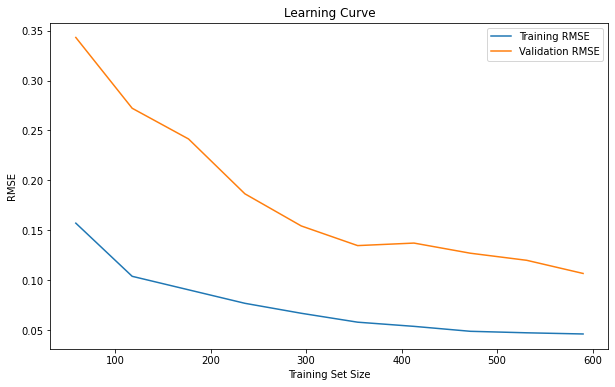

In [24]:
# 전체 데이터를 이용해 다시 학습하는 것은 비효율적임으로 저장하였던 샘플 데이터를 이용하여 학습 곡선을 그림.
sample_data = pd.read_csv(sample_file_path)

# MinMaxScaler 적용
sample_data[feature_names] = scaler.fit_transform(sample_data[feature_names])
sample_X = sample_data[feature_names]
sample_y = sample_data['hydrogen_distance']

# 학습 곡선 데이터 계산
sample_train_sizes, sample_train_scores, sample_test_scores = learning_curve(
    model, sample_X, sample_y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# RMSE 값으로 변환
train_rmse_mean = (-sample_train_scores).mean(axis=1) ** 0.5
test_rmse_mean = (-sample_test_scores).mean(axis=1) ** 0.5

# 학습 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(sample_train_sizes, train_rmse_mean, label='Training RMSE')
plt.plot(sample_train_sizes, test_rmse_mean, label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.title('Learning Curve')
plt.show()

학습곡선이 지속적으로 감소하고 있으며 Validation이 Train보다 높은 것을 보아 과적합이 발생하지 않았음을 알 수 있습니다.


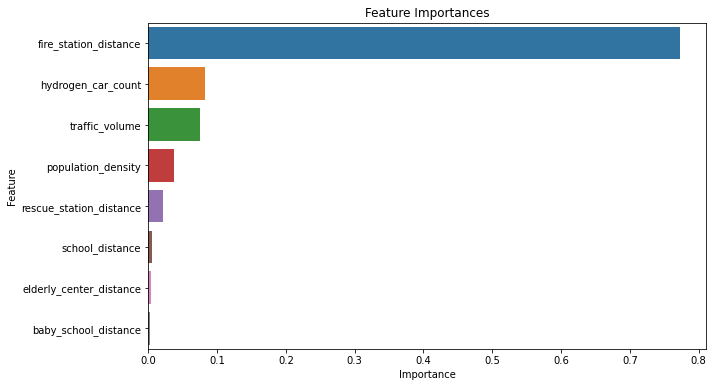

In [12]:
# 중요 변수 확인
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame(
    {'Feature': features, 'Importance': feature_importances})

# 중요 변수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.sort_values(by='Importance',
            ascending=False), x='Importance', y='Feature')
plt.title('Feature Importances')
plt.show()

In [16]:
importance_df.sort_values(by='Importance', ascending=False)

Feature  Importance
3    fire_station_distance    0.772497
6       hydrogen_car_count    0.082668
5           traffic_volume    0.074504
7       population_density    0.037111
4  rescue_station_distance    0.021112
0          school_distance    0.005650
2  elderly_center_distance    0.003865
1     baby_school_distance    0.002593

In [64]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO
import os


def visualize_tree(model, feature_names, tree_index=0):
    """
    랜덤 포레스트 모델의 개별 트리를 시각화합니다.

    Parameters:
    model (RandomForestRegressor): 학습된 랜덤 포레스트 회귀 모델
    feature_names (list): 특성 이름 리스트
    tree_index (int): 시각화할 트리의 인덱스 (기본값: 0)

    Returns:
    Image: 트리 구조를 시각화한 이미지
    """

    # 트리를 .dot 파일로 저장
    dot_data = StringIO()
    export_graphviz(model.estimators_[tree_index],
                    out_file=dot_data,
                    feature_names=feature_names,
                    filled=True,
                    rounded=True,
                    special_characters=True)

    # .dot 파일을 그래프 이미지로 변환
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())


# 트리 시각화 (두 번째 트리)
visualize_tree(model, feature_names, tree_index=1)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.57298 to fit

